In [8]:
# Load model directly
from transformers import AutoModel, DebertaV2Tokenizer, AutoTokenizer
import torch
import numpy as np
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
root_dir = r"F:/Articles/CGNet/"

In [2]:
model = AutoModel.from_pretrained("microsoft/deberta-v3-large")
tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-v3-large", use_fast=False)

In [3]:
testString = "Test Input"
tokenized = tokenizer(testString, return_tensors='pt')
tokenized.input_ids.shape
tokenized.input_ids

tensor([[    1,  4432, 21863,     2]])

In [4]:
id_vocab = {v:k for k,v in tokenizer.vocab.items()}
all_vocab_indices = list(id_vocab.keys())

In [5]:
model.embeddings

DebertaV2Embeddings(
  (word_embeddings): Embedding(128100, 1024, padding_idx=0)
  (LayerNorm): LayerNorm((1024,), eps=1e-07, elementwise_affine=True)
  (dropout): Dropout(p=0.1, inplace=False)
)

In [6]:
all_vocab_str = []
for i in range(len(id_vocab)):
    all_vocab_str.append(id_vocab[i])

In [9]:
embeddings_dict = {}
embeddings = []
for i in range(len(id_vocab)):
    out1 = model.embeddings.word_embeddings(torch.tensor([i]).unsqueeze(0)).detach()
    tok_emb = model.embeddings.LayerNorm(out1)
    embeddings_dict[id_vocab[i]] = i
    embeddings.append(torch.squeeze(tok_emb.detach()))
embeddings = torch.vstack(embeddings)

In [10]:
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

In [11]:
reducer = UMAP(n_neighbors=15, n_components=64, min_dist=0.1, metric='cosine', random_state=42, verbose=True)
embeddings64 = reducer.fit_transform(embeddings_scaled)
embeddings64.shape

F:\Articles\CGNet\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP(angular_rp_forest=True, metric='cosine', n_components=64, n_jobs=1, random_state=42, verbose=True)


F:\Articles\CGNet\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Tue Jun 10 04:17:47 2025 Construct fuzzy simplicial set
Tue Jun 10 04:17:48 2025 Finding Nearest Neighbors
Tue Jun 10 04:17:48 2025 Building RP forest with 23 trees
Tue Jun 10 04:18:26 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	 8  /  17
	 9  /  17
	 10  /  17
	 11  /  17
	 12  /  17
	 13  /  17
	 14  /  17
	 15  /  17
	 16  /  17
	 17  /  17
	Stopping threshold met -- exiting after 17 iterations
Tue Jun 10 04:21:02 2025 Finished Nearest Neighbor Search
Tue Jun 10 04:21:15 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Jun 10 04:30:23 2025 Finished embedding


(128000, 64)

In [20]:
with open(rf'{root_dir}data\ReducedEmbeddings\deberta_larg_reduced_embeddings_64.npy', 'wb') as f:
    np.save(f, embeddings64, False)

In [21]:
with open(rf'{root_dir}data\ReducedEmbeddings\deberta_larg_reduced_embeddings_64.npy', 'rb') as f:
    embeddings64 = torch.tensor(np.load(f, allow_pickle=False))
embeddings64.shape

torch.Size([128000, 64])

In [22]:
reducer = UMAP(n_neighbors=15, n_components=128, min_dist=0.1, metric='cosine', random_state=42, verbose=True)
embeddings128 = reducer.fit_transform(embeddings_scaled)
embeddings128.shape

F:\Articles\CGNet\venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
F:\Articles\CGNet\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(angular_rp_forest=True, metric='cosine', n_components=128, n_jobs=1, random_state=42, verbose=True)
Tue Jun 10 04:36:06 2025 Construct fuzzy simplicial set
Tue Jun 10 04:36:07 2025 Finding Nearest Neighbors
Tue Jun 10 04:36:07 2025 Building RP forest with 23 trees
Tue Jun 10 04:36:35 2025 NN descent for 17 iterations
	 1  /  17
	 2  /  17
	 3  /  17
	 4  /  17
	 5  /  17
	 6  /  17
	 7  /  17
	 8  /  17
	 9  /  17
	 10  /  17
	 11  /  17
	 12  /  17
	 13  /  17
	 14  /  17
	 15  /  17
	 16  /  17
	 17  /  17
	Stopping threshold met -- exiting after 17 iterations
Tue Jun 10 04:38:52 2025 Finished Nearest Neighbor Search
Tue Jun 10 04:39:00 2025 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

	completed  0  /  200 epochs
	completed  20  /  200 epochs
	completed  40  /  200 epochs
	completed  60  /  200 epochs
	completed  80  /  200 epochs
	completed  100  /  200 epochs
	completed  120  /  200 epochs
	completed  140  /  200 epochs
	completed  160  /  200 epochs
	completed  180  /  200 epochs
Tue Jun 10 04:54:36 2025 Finished embedding


(128000, 128)

In [23]:
with open(rf'{root_dir}data\ReducedEmbeddings\deberta_larg_reduced_embeddings_128.npy', 'wb') as f:
    np.save(f, embeddings128, False)

In [24]:
with open(rf'{root_dir}data\ReducedEmbeddings\deberta_larg_reduced_embeddings_128.npy', 'rb') as f:
    embeddings128 = torch.tensor(np.load(f, allow_pickle=False))
embeddings128.shape

torch.Size([128000, 128])

In [25]:
extra_tokens = {
    'g': ['good', 'bad', 'nice', 'evil', 'pleasant', 'awful', 'love', 'wicked'],
    'b': ['king', 'queen', 'prince', 'princess', 'crown', 'sovereign', 'duke'],
    'y': ['car', 'traffic', 'bicycle', 'bus', 'train', 'truck', 'motorcycle', 'lane', 'highway'],
    'r': ['basketball', 'ball', 'soccer', 'tennis', 'cricket', 'football', 'golf', 'baseball']
}

target_tokens = []
color_codes = []
for color, tokens in extra_tokens.items():
    for token in tokens:
        target_tokens.append(token)
        color_codes.append(color)

idx = [tokenizer.vocab[t] for t in target_tokens]

In [26]:
all_vocab = [id_vocab[i] for i in range(len(tokenizer.vocab))]

In [27]:
embeddings[idx]
embeddings64[idx]
embeddings128[idx]
target_vocab = [all_vocab[i] for i in idx]

In [29]:
tsne = TSNE(n_components=2, perplexity=30, early_exaggeration=1, max_iter=300, metric='cosine')

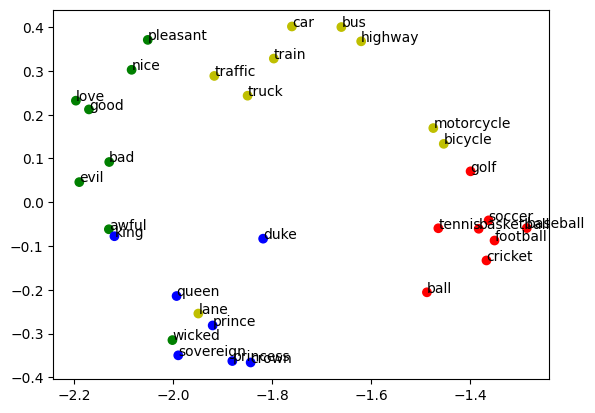

In [30]:
X_tsne = tsne.fit_transform(embeddings[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

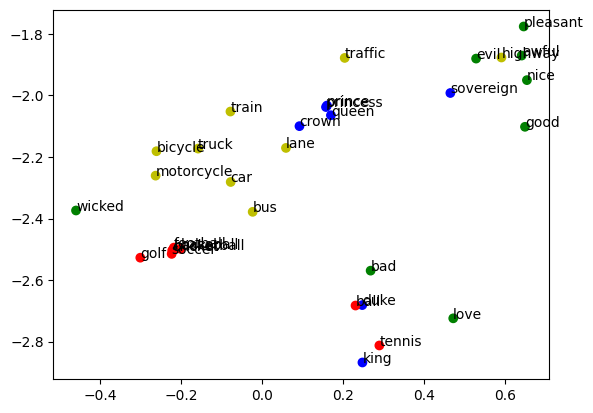

In [31]:
X_tsne = tsne.fit_transform(embeddings128[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()

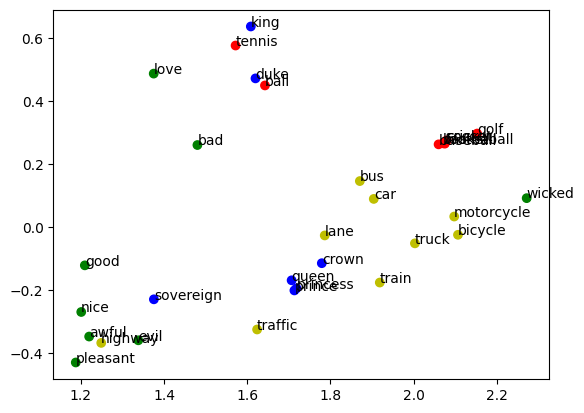

In [32]:
X_tsne = tsne.fit_transform(embeddings64[idx])
df = pd.DataFrame(X_tsne, index=target_vocab, columns=['x', 'y'])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'], c=color_codes)
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()